<a href="https://colab.research.google.com/github/Yonatanembiza/Assign-5-js/blob/main/CNN_lab5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# Preprocess the data - Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (2, 2), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.1630 - accuracy: 0.9514 - val_loss: 0.0738 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0627 - val_accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0552 - val_accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0605 - val_accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0835 - val_accuracy: 0.9788


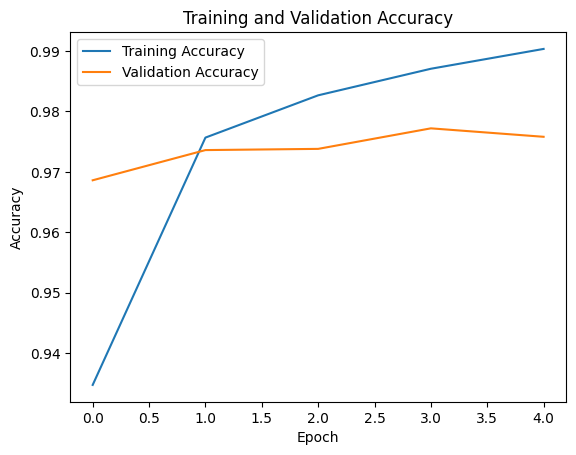

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

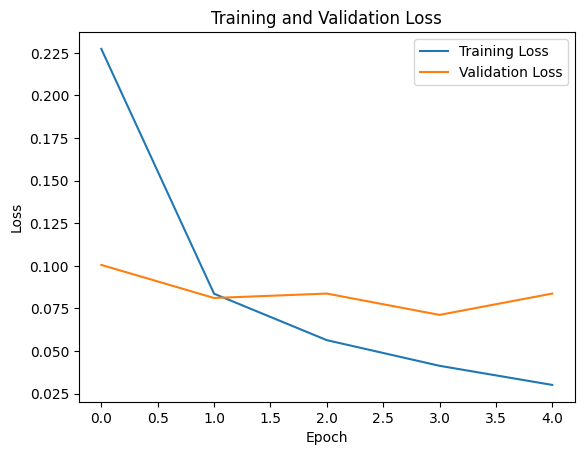

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.8792 - accuracy: 0.7114 - 3s/epoch - 10ms/step

Test accuracy: 0.7113999724388123
